In [45]:
import os
import random
import time

import numpy as np
import pandas as pd
from itertools import combinations

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_addons as tfa

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

def set_random_seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)


set_random_seed(seed=0)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')), tf.test.is_built_with_cuda())

Num GPUs Available: 0 True


In [12]:
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 16,
    'figure.figsize': (14, 6),
    'axes.grid' : True,
    'axes.grid.axis': 'y'
})

In [13]:
sel_cols = ['date', 'month', 'hour', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud', 'pow_gen']
all_df = pd.read_csv("C:/Users/wjddu/git/BigData/train/train_ori.csv", parse_dates=['date'], index_col='date', usecols=sel_cols)
all_df.shape

(35487, 8)

In [14]:
all_df.head(20)

,month,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
date,,,,,,,,
2016-12-13 14:00:00,12,14,140.631,4.3,77,0.6,100.000,0
2016-12-13 15:00:00,12,15,85.793,4.3,80,1.1,72.222,0
2016-12-13 16:00:00,12,16,32.590,3.8,80,0.6,55.556,0
2016-12-13 17:00:00,12,17,0.154,3.4,80,0.2,13.889,0
2016-12-13 18:00:00,12,18,0.000,2.6,86,0.4,2.778,0
2016-12-13 19:00:00,12,19,0.000,2.4,84,0.0,0.000,0
2016-12-13 20:00:00,12,20,0.000,2.4,81,-0.5,0.000,0
2016-12-13 21:00:00,12,21,0.000,2.2,78,-1.2,0.000,0
2016-12-13 22:00:00,12,22,0.000,1.8,78,-1.6,0.000,0


In [42]:
def calculate_pow_gen(x, window=11):
    res = []    
    for i in range(x.shape[0]):
        
        start = 0 if i < window else 1 + (i-window)
        end = i+1
        
        res.append(np.sum(x[start:end].values))
    
    return res


all_df['pow_gen_daily'] = calculate_pow_gen(all_df['pow_gen'])
all_df.head(30)

,month,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud,pow_gen_daily
date,,,,,,,,,
2016-12-13 14:00:00,12,14,140.631,4.3,77,0.6,100.000,0,140.631
2016-12-13 15:00:00,12,15,85.793,4.3,80,1.1,72.222,0,226.424
2016-12-13 16:00:00,12,16,32.590,3.8,80,0.6,55.556,0,259.014
2016-12-13 17:00:00,12,17,0.154,3.4,80,0.2,13.889,0,259.168
2016-12-13 18:00:00,12,18,0.000,2.6,86,0.4,2.778,0,259.168
2016-12-13 19:00:00,12,19,0.000,2.4,84,0.0,0.000,0,259.168
2016-12-13 20:00:00,12,20,0.000,2.4,81,-0.5,0.000,0,259.168
2016-12-13 21:00:00,12,21,0.000,2.2,78,-1.2,0.000,0,259.168
2016-12-13 22:00:00,12,22,0.000,1.8,78,-1.6,0.000,0,259.168


In [17]:
X_features = ['month', 'hour', 'temperature', 'humidity', 'dew_point', 'sol_rad', 'cloud']
y_feature = ['pow_gen']

X = all_df[X_features]
y = all_df[y_feature]

X.shape, y.shape

((35487, 7), (35487, 1))

In [18]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_norm, y_norm = X.copy(), y.copy()
X_norm.iloc[:, 2:] = x_scaler.fit_transform(X_norm.iloc[:, 2:])
y_norm.iloc[:, :] = y_scaler.fit_transform(y_norm.iloc[:, :])

X_norm.shape, y_norm.shape

((35487, 7), (35487, 1))

In [44]:
def split_sequences(feature, label, timestep=22):
    X, y = [], []
    
    for i in range(timestep, len(feature)):
        
        _X = feature[(i-timestep):i]
        _y = label[i:i+1]

        X.append(_X)
        y.append(_y)
    return np.array(X), np.array(y)

X_total, y_total = split_sequences(X_norm.values, y_norm.values.flatten())
X_total.shape, y_total.shape

((35465, 22, 7), (35465, 1))

In [22]:
X_learn, X_test, y_learn, y_test = train_test_split(X_total, y_total, test_size=0.2, shuffle=False, random_state=0)
y_test_inv = y_scaler.inverse_transform(y_test)

# y_true_df = pd.DataFrame({'y_true': y_test_inv.ravel()})
# y_true_df.to_csv('./data_0310/total_result.csv', index=False)

X_learn.shape, X_test.shape, y_learn.shape, y_test.shape

((28372, 22, 7), (7093, 22, 7), (28372, 1), (7093, 1))

In [40]:
y_learn

array([[0.09463916],
       [0.11160587],
       [0.16367721],
       ...,
       [0.25682516],
       [0.51457526],
       [0.71656287]])

In [41]:
y_test

array([[0.85750254],
       [0.91729194],
       [0.91784819],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [23]:
def create_train_valid_test(X, y, shuffle=True):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=X_test.shape[0], random_state=0, shuffle=shuffle)
    return X_train, X_val, y_train, y_val

In [24]:
def generate_model_lstm(trainX, trainy, valX, valy, units=60, name='lstm', ndx=0):
    
    start_time = time.time()
    tf.keras.backend.clear_session()
    set_random_seed(seed=0)
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units))
    model.add(tf.keras.layers.Dense(1))
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto', restore_best_weights=True)
    
    filepath = './data/0222/%s_%d_best.hdf5' % (name, ndx)
    
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
    tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])
    
    model.fit(trainX, trainy, epochs=1000, validation_data = (valX, valy), verbose=0, shuffle=False, callbacks=[early_stop, tqdm_callback])
    print("--- %s seconds ---" % (time.time() - start_time))
    return model

def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return np.round(r2*100, 1), np.round(mae, 1), np.round(rmse, 1)

def save_result(colname, data):
    path = './data_0310/total_result.csv'
    result_df = pd.read_csv(path)
    result_df[colname] = data.ravel()
    result_df.to_csv(path, index=False)

In [25]:
X_train, X_val, y_train, y_val = create_train_valid_test(X_learn, y_learn, shuffle=False)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((21279, 22, 7), (7093, 22, 7), (21279, 1), (7093, 1))

In [26]:
model = generate_model_lstm(X_train, y_train, X_val, y_val, units=100)

y_forecast = model.predict(X_test)
y_forecast_inv = y_scaler.inverse_transform(y_forecast)
r2, mae, rmse = evaluate(y_test_inv, y_forecast_inv)


r2, rmse

Training:   0%|                                                                              0/1000 ETA: ?s,  …

--- 790.0548689365387 seconds ---


(91.0, 111.4)

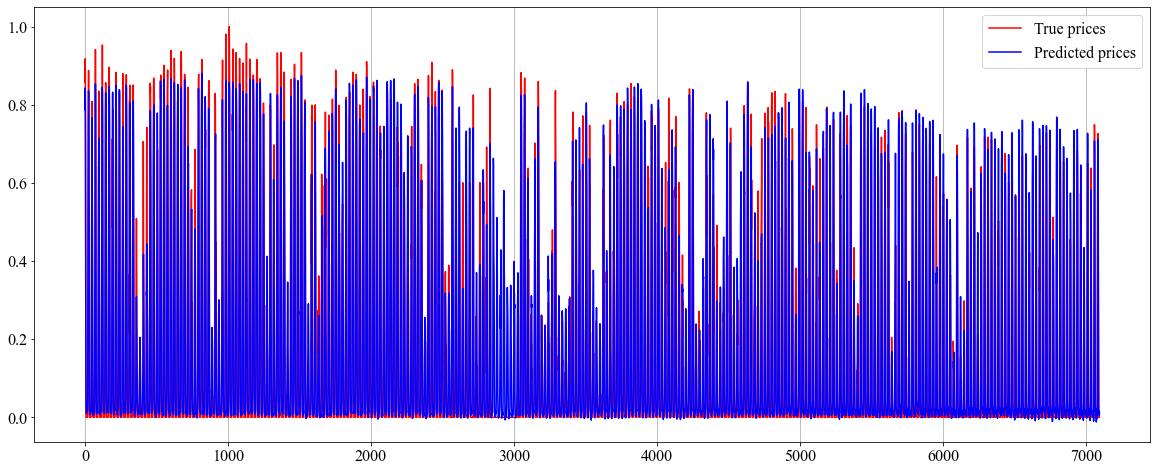

In [50]:
#예측 결과 시각화
plt.rcParams["figure.figsize"] = (20,8)
x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, y_forecast[x_range], color='blue')
plt.legend(['True prices', 'Predicted prices'], loc='best')
plt.grid()
plt.show()

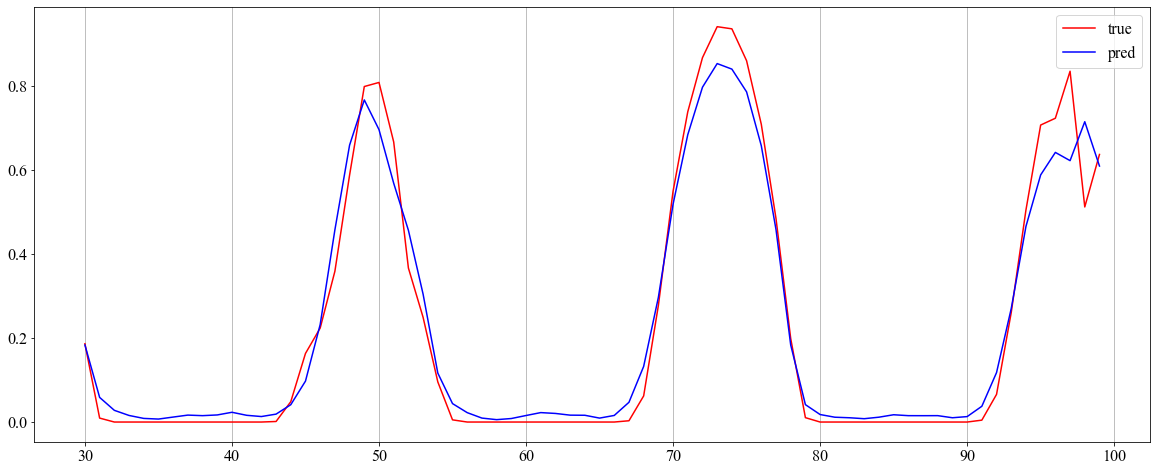

In [52]:
x_range = range(30,200)
plt.rcParams["figure.figsize"] = (20,8)
plt.plot(x_range, y_test[x_range], color='red', label="true")
plt.plot(x_range, y_forecast[x_range], color='blue', label="pred")
plt.legend()
plt.grid()
plt.show()